In [1]:
import os
import random
import numpy as np
import pandas as pd
import patsy
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.stats.anova import AnovaRM
from statsmodels.regression.mixed_linear_model import MixedLMResults
from scipy import stats
import seaborn as sns

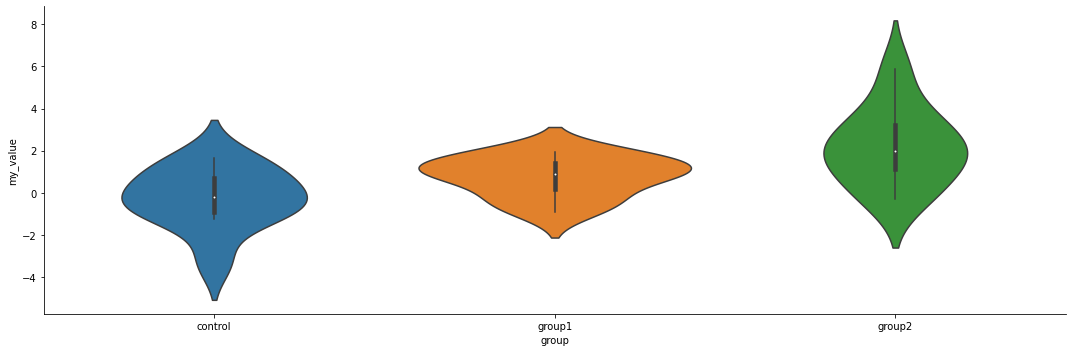

In [3]:
# information on experimental design
group_list = ['control','group1','group2']
subs_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

# read data into dataframe
df_1way = pd.DataFrame(columns=["group", "my_value"])
my_row = 0
for ind_g, group in enumerate(group_list):
    for sub in subs_list:
        # generate random value here as example
        my_val = np.random.normal(ind_g, 1, 1)[0]
        df_1way.loc[my_row] = [group, my_val]
        my_row = my_row + 1

# inspect data
sns.catplot(x="group", y="my_value", data=df_1way, dodge=True, kind='violin', aspect=3)
plt.show()


In [4]:
# generate model for linear regression
my_model = smf.ols(formula='my_value ~ group', data=df_1way)

# fit model to data to obtain parameter estimates
my_model_fit = my_model.fit()

# print summary of linear regression
print(my_model_fit.summary())

# show anova table
anova_table = sm.stats.anova_lm(my_model_fit, typ=2)
print(anova_table)


                            OLS Regression Results                            
Dep. Variable:               my_value   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     7.086
Date:                Mon, 08 Feb 2021   Prob (F-statistic):            0.00336
Time:                        13:13:47   Log-Likelihood:                -52.140
No. Observations:                  30   AIC:                             110.3
Df Residuals:                      27   BIC:                             114.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.2646      0.459     

In [6]:
# compare p-value to f_oneway analysis
F, p = stats.f_oneway(df_1way[df_1way['group'] == 'control'].my_value, df_1way[df_1way['group'] == 'group1'].my_value, df_1way[df_1way['group'] == 'group2'].my_value)
print(p)


0.0033599540809653612


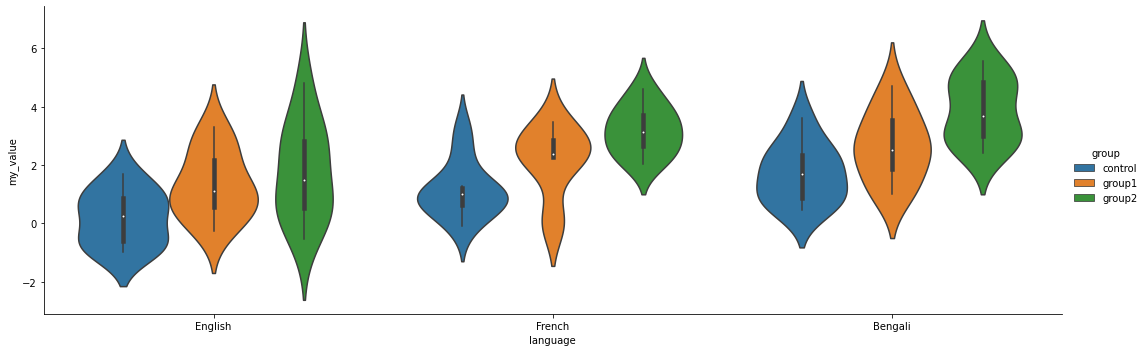

In [8]:
# information on experimental design
group_list = ['control','group1','group2']
language_list = ['English', 'French', 'Bengali']
subs_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

# read data into dataframe
df_2way = pd.DataFrame(columns=["group", "language", "my_value"])
my_row = 0
for ind_g, group in enumerate(group_list):
    for ind_l, lan in enumerate(language_list):
        for sub in subs_list:
                # generate random value here as example
                my_val = np.random.normal(ind_g + ind_l, 1, 1)[0]
                df_2way.loc[my_row] = [group, lan, my_val]
                my_row = my_row + 1

# plot data
sns.catplot(x="language", y="my_value", data=df_2way, dodge=True, hue='group', kind='violin', aspect=3)
plt.show()


In [9]:
# fit model to data to obtain parameter estimates
my_model_fit = smf.ols(formula='my_value ~ group * language', data=df_2way).fit()
# print summary of linear regression
print(my_model_fit.summary())
# show anova table
print(sm.stats.anova_lm(my_model_fit, typ=2))


                            OLS Regression Results                            
Dep. Variable:               my_value   R-squared:                       0.489
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     9.697
Date:                Mon, 08 Feb 2021   Prob (F-statistic):           2.47e-09
Time:                        13:15:27   Log-Likelihood:                -134.26
No. Observations:                  90   AIC:                             286.5
Df Residuals:                      81   BIC:                             309.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

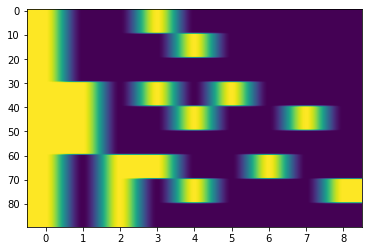

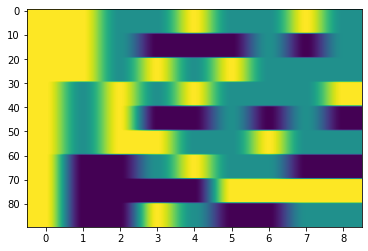

In [10]:
# use Patsy to construct the model above
model_matrix = patsy.dmatrix("group * language", df_2way)
# visualize model
plt.show(plt.imshow(model_matrix, aspect='auto'))
# use sum coding scheme for factors
plt.show(plt.imshow(patsy.dmatrix("C(group, Sum) * C(language, Sum)", df_2way), aspect='auto'))


In [11]:
# information on experimental design
subs_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
task_list = ['task1', 'task2', 'task3']
condition_list = ['pre', 'post']

# read data into dataframe
df_2way_rm = pd.DataFrame(columns=["sub_id", "task", "condition", "my_value"])
my_row = 0
# unique subject-ID as additional factor
sub_id = 0
for sub in subs_list:
    sub_id = sub_id + 1
    for ind_t, task in enumerate(task_list):
        for ind_c, con in enumerate(condition_list):
            # generate random value here as example
            my_val = np.random.normal(ind_t + ind_c, 1, 1)[0]
            df_2way_rm.loc[my_row] = [sub_id, task, con, my_val]
            my_row = my_row + 1

# conduct ANOVA using mixedlm
my_model_fit = smf.mixedlm("my_value ~ task * condition", df_2way_rm, groups=df_2way_rm["sub_id"]).fit()
# get random effects
my_model_fit.random_effects
# get fixed effects (no f-test implemented)
my_model_fit.summary()


<class 'statsmodels.iolib.summary2.Summary'>
"""
                  Mixed Linear Model Regression Results
=========================================================================
Model:                   MixedLM       Dependent Variable:       my_value
No. Observations:        60            Method:                   REML    
No. Groups:              10            Scale:                    1.2457  
Min. group size:         6             Log-Likelihood:           -89.9219
Max. group size:         6             Converged:                Yes     
Mean group size:         6.0                                             
-------------------------------------------------------------------------
                               Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-------------------------------------------------------------------------
Intercept                       0.235    0.356  0.660 0.509 -0.463  0.933
task[T.task2]                   1.334    0.499  2.673 0.008  0.356  2.312
task[T.task3]                   2.841    0.499  5.691 0.000  1.862  3.819
condition[T.pre]               -0.401    0.499 -0.802 0.422 -1.379  0.578
task[T.task2]:condition[T.pre] -0.446    0.706 -0.632 0.527 -1.830  0.937
task[T.task3]:condition[T.pre] -0.705    0.706 -0.999 0.318 -2.088  0.679
Group Var                       0.022    0.106                           
=========================================================================

"""

In [12]:
# conduct ANOVA using AnovaRM
my_model_fit = AnovaRM(df_2way_rm, 'my_value', 'sub_id', within=['task', 'condition']).fit()
print(my_model_fit.anova_table)


                  F Value  Num DF  Den DF    Pr > F
task            24.744685     2.0    18.0  0.000007
condition       12.823901     1.0     9.0  0.005921
task:condition   0.424194     2.0    18.0  0.660670


In [13]:
group_list = ['control','group1','group2']
language_list = ['English', 'French', 'Bengali']
subs_list = ['01', '02', '03', '04', '05', '06', '07', '08', '09', '10']
task_list = ['task1', 'task2', 'task3']
condition_list = ['pre', 'post']

# read data into dataframe
df_full = pd.DataFrame(columns=["group", "language", "sub_id", "task", "condition", "my_value"])
my_row = 0
# unique subject-ID
sub_id = 0
for ind_g, group in enumerate(group_list):
    for ind_l, lan in enumerate(language_list):
        for sub in subs_list:
            sub_id = sub_id + 1
            for ind_t, task in enumerate(task_list):
                for ind_c, con in enumerate(condition_list):
                    # generate random value here as example
                    my_val = np.random.normal(ind_c + ind_t, 1, 1)[0]
                    df_full.loc[my_row] = [group, lan, sub_id, task, con, my_val]
                    my_row = my_row + 1

# conduct ANOVA using mixedlm
my_model_fit = smf.mixedlm("my_value ~ group * language * condition", df_full, groups=df_full["sub_id"]).fit()
# get random effects
my_model_fit.random_effects
# get fixed effects
my_model_fit.summary()


/Users/shionguha/opt/anaconda3/lib/python3.8/site-packages/statsmodels/regression/mixed_linear_model.py:2149: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Mixed Linear Model Regression Results
===============================================================================================
Model:                          MixedLM              Dependent Variable:              my_value 
No. Observations:               540                  Method:                          REML     
No. Groups:                     90                   Scale:                           1.7546   
Min. group size:                6                    Log-Likelihood:                  -918.0437
Max. group size:                6                    Converged:                       Yes      
Mean group size:                6.0                                                            
-----------------------------------------------------------------------------------------------
                                                     Coef.  Std.Err.   z    P>|z| [0.025 0.975]
-----------------------------------------------------------------------------------------------
Intercept                                             1.905    0.242  7.878 0.000  1.431  2.379
group[T.group1]                                      -0.277    0.342 -0.809 0.418 -0.947  0.394
group[T.group2]                                       0.144    0.342  0.421 0.674 -0.526  0.814
language[T.English]                                   0.102    0.342  0.298 0.766 -0.568  0.772
language[T.French]                                    0.123    0.342  0.361 0.718 -0.547  0.794
condition[T.pre]                                     -1.000    0.342 -2.925 0.003 -1.671 -0.330
group[T.group1]:language[T.English]                   0.444    0.484  0.918 0.359 -0.504  1.392
group[T.group2]:language[T.English]                  -0.217    0.484 -0.449 0.654 -1.165  0.731
group[T.group1]:language[T.French]                    0.361    0.484  0.747 0.455 -0.587  1.309
group[T.group2]:language[T.French]                    0.056    0.484  0.115 0.908 -0.892  1.004
group[T.group1]:condition[T.pre]                      0.391    0.484  0.808 0.419 -0.557  1.339
group[T.group2]:condition[T.pre]                     -0.292    0.484 -0.604 0.546 -1.240  0.656
language[T.English]:condition[T.pre]                 -0.107    0.484 -0.222 0.825 -1.055  0.841
language[T.French]:condition[T.pre]                  -0.187    0.484 -0.387 0.698 -1.135  0.761
group[T.group1]:language[T.English]:condition[T.pre] -0.586    0.684 -0.856 0.392 -1.926  0.755
group[T.group2]:language[T.English]:condition[T.pre]  0.739    0.684  1.080 0.280 -0.602  2.079
group[T.group1]:language[T.French]:condition[T.pre]  -0.324    0.684 -0.474 0.636 -1.665  1.017
group[T.group2]:language[T.French]:condition[T.pre]   0.469    0.684  0.686 0.493 -0.872  1.810
Group Var                                             0.000    0.097                           
===============================================================================================

"""

In [15]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.graphics.factorplots import interaction_plot
import matplotlib.pyplot as plt
from scipy import stats

In [16]:
datafile = "../data/ToothGrowth.csv"
data = pd.read_csv(datafile)

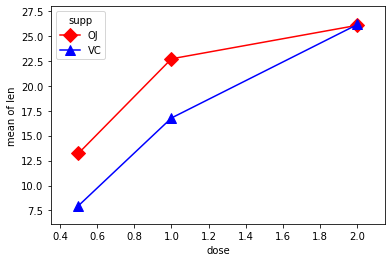

In [17]:
fig = interaction_plot(data.dose, data.supp, data.len,
             colors=['red','blue'], markers=['D','^'], ms=10)

In [25]:
formula = 'len ~ C(supp) + C(dose) + C(supp):C(dose)'
model = ols(formula, data).fit()
aov_table = anova_lm(model, typ=2)

In [28]:
N = len(data.len)
df_a = len(data.supp.unique()) - 1
df_b = len(data.dose.unique()) - 1
df_axb = df_a*df_b 
df_w = N - (len(data.supp.unique())*len(data.dose.unique()))
grand_mean = data['len'].mean()

In [29]:
ssq_a = sum([(data[data.supp ==l].len.mean()-grand_mean)**2 for l in data.supp])

In [30]:
ssq_b = sum([(data[data.dose ==l].len.mean()-grand_mean)**2 for l in data.dose])

In [31]:
ssq_t = sum((data.len - grand_mean)**2)

In [24]:
vc = data[data.supp == 'VC']
oj = data[data.supp == 'OJ']
vc_dose_means = [vc[vc.dose == d].len.mean() for d in vc.dose]
oj_dose_means = [oj[oj.dose == d].len.mean() for d in oj.dose]
ssq_w = sum((oj.len - oj_dose_means)**2) +sum((vc.len - vc_dose_means)**2

SyntaxError: unexpected EOF while parsing (<ipython-input-24-b9d172680bf4>, line 5)